In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp
import seaborn as sns

In [2]:
mobsuitePP = pd.read_csv("/home/haley/Desktop/Complete_Assemblies_Plasmid/12122022_EcoliPlasmidDetection_isolates_crosstab_mobsuite_analysisfriendly_PP.csv")
mobsuitenoPP = pd. read_csv("/home/haley/Desktop/Complete_Assemblies_Plasmid/12122022_EcoliPlasmidDetection_isolates_crosstab_mobsuite_analysisfriendly_no_PP.csv")

In [3]:
#One way ANOVA for impact of Sequencing condition on total plasmids in each assembly type
results = []
#'source' is AMR, GI, phage, etc....
for AT in mobsuitenoPP['Assembly_Type'].unique():
    #make the model
    model = smf.ols('Corrected_Total_Plasmids ~ C(Sequencing_Kit)', data=mobsuitenoPP[mobsuitenoPP['Assembly_Type']==AT]).fit()
    #calculate anova. We use type 3 SS in this paper.
    d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
    d = d[['PR(>F)']]
    d.rename({'PR(>F)': "{}_p".format(AT)}, axis=1, inplace=True)
    results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()[['Hybrid_p', 'Long_Read_p']]
all_r


,Hybrid_p,Long_Read_p
C(Sequencing_Kit),0.679739,0.583494


In [4]:
records = []
for AT in mobsuitenoPP['Assembly_Type'].unique(): #AMR, HMR, plasmid, etc...
    # this calculates adjusted p value
    d = sp.posthoc_ttest(mobsuitenoPP[mobsuitenoPP['Assembly_Type']==AT],
                 val_col='Corrected_Total_Plasmids',
                 group_col='Sequencing_Kit',
                 p_adjust='bonferroni')
    #Format the result into a dict
    for i in d.index:
        for j in d.columns:
            records.append({'Feature': AT, 'query': i, 'subject': j, 'P': d.loc[i][j]})
ttests = pd.DataFrame.from_records(records)
ttests.head()

,Feature,query,subject,P
0,Hybrid,Ligation,Ligation,1.000000
1,Hybrid,Ligation,Rapid,0.679739
2,Hybrid,Rapid,Ligation,0.679739
3,Hybrid,Rapid,Rapid,1.000000
4,Long_Read,Ligation,Ligation,1.000000


In [5]:
ttests.to_csv("12122022_EcoliPlasmidDetection_PlasmidsvsSequencingKitbyAssembly_Type_ttests.csv")

In [6]:
# One way ANOVA to see impact of assembly condition on total number of plasmid clusters detected in both assembly types
results = []
#'source' is AMR, GI, phage, etc....
for AT in mobsuitenoPP['Assembly_Type'].unique():
    #make the model
    model = smf.ols('Corrected_Total_Plasmids ~ C(Filtering)', data=mobsuitenoPP[mobsuitenoPP['Assembly_Type']==AT]).fit()
    #calculate anova. We use type 3 SS in this paper.
    d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
    d = d[['PR(>F)']]
    d.rename({'PR(>F)': "{}_p".format(AT)}, axis=1, inplace=True)
    results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()[['Hybrid_p', 'Long_Read_p']]
all_r

,Hybrid_p,Long_Read_p
C(Filtering),0.934235,0.058108


In [7]:
records = []
for AT in mobsuitenoPP['Assembly_Type'].unique(): #AMR, HMR, plasmid, etc...
    # this calculates adjusted p value
    d = sp.posthoc_ttest(mobsuitenoPP[mobsuitenoPP['Assembly_Type']==AT],
                 val_col='Corrected_Total_Plasmids',
                 group_col='Filtering',
                 p_adjust='bonferroni')
    #Format the result into a dict
    for i in d.index:
        for j in d.columns:
            records.append({'Feature': AT, 'query': i, 'subject': j, 'P': d.loc[i][j]})
ttests = pd.DataFrame.from_records(records)
ttests.head()

,Feature,query,subject,P
0,Hybrid,Filtered,Filtered,1.000000
1,Hybrid,Filtered,Unfiltered,0.934235
2,Hybrid,Unfiltered,Filtered,0.934235
3,Hybrid,Unfiltered,Unfiltered,1.000000
4,Long_Read,Filtered,Filtered,1.000000


In [8]:
ttests.to_csv("12122022_EcoliPlasmidDetection_PlasmidsvsFilteringbyAssembly_Type_noPP_ttests.csv")

In [9]:
# One way ANOVA to see impact of assembly condition on total number of plasmid clusters detected in both assembly types
results = []
#'source' is AMR, GI, phage, etc....
for AT in mobsuitenoPP['Assembly_Type'].unique():
    #make the model
    model = smf.ols('Corrected_Total_Plasmids ~ C(Category)', data=mobsuitenoPP[mobsuitenoPP['Assembly_Type']==AT]).fit()
    #calculate anova. We use type 3 SS in this paper.
    d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
    d = d[['PR(>F)']]
    d.rename({'PR(>F)': "{}_p".format(AT)}, axis=1, inplace=True)
    results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()[['Hybrid_p', 'Long_Read_p']]
all_r

,Hybrid_p,Long_Read_p
C(Category),0.971676,0.886602


In [10]:
records = []
for AT in mobsuitenoPP['Assembly_Type'].unique(): #AMR, HMR, plasmid, etc...
    # this calculates adjusted p value
    d = sp.posthoc_ttest(mobsuitenoPP[mobsuitenoPP['Assembly_Type']==AT],
                 val_col='Corrected_Total_Plasmids',
                 group_col='Category',
                 p_adjust='bonferroni')
    #Format the result into a dict
    for i in d.index:
        for j in d.columns:
            records.append({'Feature': AT, 'query': i, 'subject': j, 'P': d.loc[i][j]})
ttests = pd.DataFrame.from_records(records)
ttests.head()

,Feature,query,subject,P
0,Hybrid,HLF,HLF,1.0
1,Hybrid,HLF,HLUF,1.0
2,Hybrid,HLF,HRF,1.0
3,Hybrid,HLF,HRUF,1.0
4,Hybrid,HLUF,HLF,1.0


In [11]:
ttests.to_csv("12122022_EcoliPlasmidDetection_PlasmidsvsCategorybyAssembly_Type_noPP_ttests.csv")

In [12]:
#One way ANOVA for impact of assembly type on total number of plasmid clusters detected by assembly condition
results = []
#'source' is AMR, GI, phage, etc....
for AC in mobsuitenoPP['Filtering'].unique():
    #make the model
    model = smf.ols('Corrected_Total_Plasmids ~ C(Assembly_Type)', data=mobsuitenoPP[mobsuitenoPP['Filtering']==AC]).fit()
    #calculate anova. We use type 3 error correction in this paper.
    d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
    d = d[['PR(>F)']]
    d.rename({'PR(>F)': "{}_p".format(AC)}, axis=1, inplace=True)
    results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()[['Filtered_p', 'Unfiltered_p']]
all_r

,Filtered_p,Unfiltered_p
C(Assembly_Type),0.041322,0.587068


In [13]:
#calculating t-tests for the above ANOVA
records = []
for AC in mobsuitenoPP['Filtering'].unique(): #AMR, HMR, plasmid, etc...
    # this calculates adjusted p value
    d = sp.posthoc_ttest(mobsuitenoPP[mobsuitenoPP['Filtering']==AC],
                 val_col='Corrected_Total_Plasmids',
                 group_col='Assembly_Type',
                 p_adjust='bonferroni')
    #Format the result into a dict
    for i in d.index:
        for j in d.columns:
            records.append({'Feature': AC, 'query': i, 'subject': j, 'P': d.loc[i][j]})
ttests = pd.DataFrame.from_records(records)
ttests.head()

,Feature,query,subject,P
0,Filtered,Hybrid,Hybrid,1.000000
1,Filtered,Hybrid,Long_Read,0.041322
2,Filtered,Long_Read,Hybrid,0.041322
3,Filtered,Long_Read,Long_Read,1.000000
4,Unfiltered,Hybrid,Hybrid,1.000000


In [14]:
ttests.to_csv("12122022_EcoliPlasmidDetection_PlasmidsvsAssembly_TypebyFiltering_noPP_ttests.csv")

In [15]:
#One way ANOVA to see impact of assembly type on total number of plasmid clusters detected by sequencing condition
results = []
#'source' is AMR, GI, phage, etc....
for SC in mobsuitenoPP['Sequencing_Kit'].unique():
    #make the model
    model = smf.ols('Corrected_Total_Plasmids ~ C(Assembly_Type)', data=mobsuitenoPP[mobsuitenoPP['Sequencing_Kit']==SC]).fit()
    #calculate anova. We use type 3 error correction in this paper.
    d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
    d = d[['PR(>F)']]
    d.rename({'PR(>F)': "{}_p".format(SC)}, axis=1, inplace=True)
    results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()[['Rapid_p', 'Ligation_p']]
all_r

,Rapid_p,Ligation_p
C(Assembly_Type),0.042913,0.469851


In [16]:
#calculating t-tests for the above ANOVA
records = []
for SC in mobsuitenoPP['Sequencing_Kit'].unique(): #AMR, HMR, plasmid, etc...
    # this calculates adjusted p value
    d = sp.posthoc_ttest(mobsuitenoPP[mobsuitenoPP['Sequencing_Kit']==SC],
                 val_col='Corrected_Total_Plasmids',
                 group_col='Assembly_Type',
                 p_adjust='bonferroni')
    #Format the result into a dict
    for i in d.index:
        for j in d.columns:
            records.append({'Feature': SC, 'query': i, 'subject': j, 'P': d.loc[i][j]})
ttests = pd.DataFrame.from_records(records)
ttests.head()

,Feature,query,subject,P
0,Ligation,Hybrid,Hybrid,1.000000
1,Ligation,Hybrid,Long_Read,0.469851
2,Ligation,Long_Read,Hybrid,0.469851
3,Ligation,Long_Read,Long_Read,1.000000
4,Rapid,Hybrid,Hybrid,1.000000


In [17]:
ttests.to_csv("12122022_EcoliPlasmidDetection_PlasmidsvsAssemblyTypebySequencing_Kit_noPP_ttests.csv")

In [18]:
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

[(('Hybrid', 'Filtered'), ('Hybrid', 'Unfiltered')), (('Long_Read', 'Filtered'), ('Long_Read', 'Unfiltered'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Long_Read_Filtered vs. Long_Read_Unfiltered: t-test independent samples, P_val:5.811e-02 t=-1.905e+00
Hybrid_Filtered vs. Hybrid_Unfiltered: t-test independent samples, P_val:9.342e-01 t=8.280e-02


(<AxesSubplot:xlabel='Assembly_Type', ylabel='Corrected_Total_Plasmids'>,
  <statannotations.Annotation.Annotation at 0x7fb4b0481a00>])

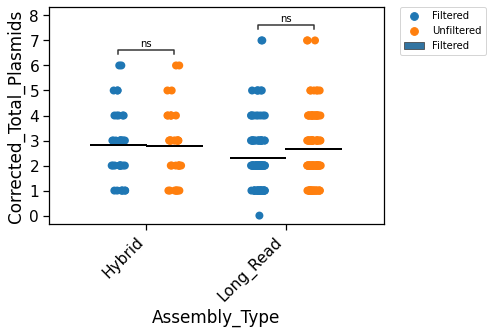

In [19]:
#making lists with the unique values of Tissue_Time and Vaccine column
s = mobsuitenoPP['Assembly_Type'].unique() #All the unique feature types.
h = mobsuitenoPP['Filtering'].unique() #All the unique habitats.
#Make a dict with 'Assembly' keys. each entry in the dict points to a list of all the conditions
d = {} 
for i in s:
    d[i] = list(h)

#Use the dict to make the pairs
pairs = []
for i in d:
    stuff = it.combinations(d[i], r=2)
    for j in stuff:
        pairs.append( ((i, j[0]), (i, j[1])) )
print(pairs)
##############################################
states_subcat =["Hybrid", "Long_Read"]
states_order =["Filtered", "Unfiltered"] 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': mobsuitenoPP, 'x': 'Assembly_Type', 'y': 'Corrected_Total_Plasmids', "order": states_subcat, 'hue': 'Filtering', "hue_order": states_order, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Assembly_Type", y="Corrected_Total_Plasmids", data=mobsuitenoPP, size=8, order=states_subcat, hue="Filtering", dodge=True)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Assembly_Type",
            y="Corrected_Total_Plasmids",
            data=mobsuitenoPP,
            showfliers=False,
            showbox=False,
            showcaps=False,
            hue="Filtering",
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

[(('Filtered', 'Hybrid'), ('Filtered', 'Long_Read')), (('Unfiltered', 'Hybrid'), ('Unfiltered', 'Long_Read'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Unfiltered_Hybrid vs. Unfiltered_Long_Read: t-test independent samples, P_val:5.871e-01 t=5.443e-01
Filtered_Hybrid vs. Filtered_Long_Read: t-test independent samples, P_val:4.132e-02 t=2.058e+00


(<AxesSubplot:xlabel='Filtering', ylabel='Corrected_Total_Plasmids'>,
  <statannotations.Annotation.Annotation at 0x7fb4b057a7f0>])

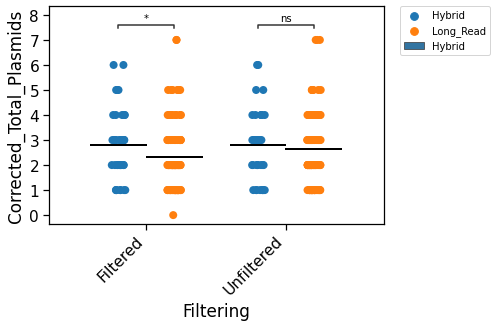

In [20]:
#making lists with the unique values of Assembly Condition and Assembly_Type column
s = mobsuitenoPP['Filtering'].unique() #All the unique feature types.
h = mobsuitenoPP['Assembly_Type'].unique() #All the unique habitats.
#Make a dict with Assembly keys. each entry in the dict points to a list of all the conditions
d = {} 
for i in s:
    d[i] = list(h)

#Use the dict to make the pairs
pairs = []
for i in d:
    stuff = it.combinations(d[i], r=2)
    for j in stuff:
        pairs.append( ((i, j[0]), (i, j[1])) )
print(pairs)
##############################################
states_subcat =["Filtered", "Unfiltered"]
states_order =["Hybrid", "Long_Read"] 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': mobsuitenoPP, 'x': 'Filtering', 'y': 'Corrected_Total_Plasmids', "order": states_subcat, 'hue': 'Assembly_Type', "hue_order": states_order, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Filtering", y="Corrected_Total_Plasmids", data=mobsuitenoPP, size=8, order=states_subcat, hue="Assembly_Type", dodge=True)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Filtering",
            y="Corrected_Total_Plasmids",
            data=mobsuitenoPP,
            showfliers=False,
            showbox=False,
            showcaps=False,
            hue="Assembly_Type",
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

[(('Ligation', 'Hybrid'), ('Ligation', 'Long_Read')), (('Rapid', 'Hybrid'), ('Rapid', 'Long_Read'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Rapid_Hybrid vs. Rapid_Long_Read: t-test independent samples, P_val:4.291e-02 t=2.042e+00
Ligation_Hybrid vs. Ligation_Long_Read: t-test independent samples, P_val:4.699e-01 t=7.245e-01


(<AxesSubplot:xlabel='Sequencing_Kit', ylabel='Corrected_Total_Plasmids'>,
  <statannotations.Annotation.Annotation at 0x7fb4b03581c0>])

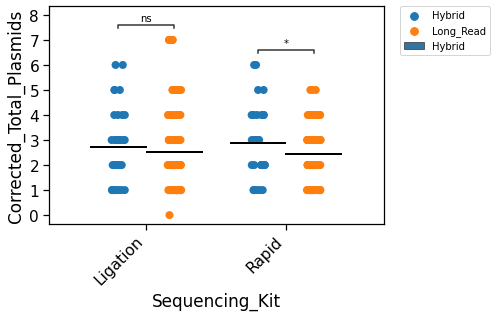

In [21]:
#making lists with the unique values of Sequence Condition and Assembly Type column
s = mobsuitenoPP['Sequencing_Kit'].unique() #All the unique feature types.
h = mobsuitenoPP['Assembly_Type'].unique() #All the unique habitats.
#Make a dict with keys. each entry in the dict points to a list of all the conditions
d = {} 
for i in s:
    d[i] = list(h)

#Use the dict to make the pairs
pairs = []
for i in d:
    stuff = it.combinations(d[i], r=2)
    for j in stuff:
        pairs.append( ((i, j[0]), (i, j[1])) )
print(pairs)
##############################################
states_subcat =["Ligation", "Rapid"]
states_order =["Hybrid", "Long_Read"] 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': mobsuitenoPP, 'x': 'Sequencing_Kit', 'y': 'Corrected_Total_Plasmids', "order": states_subcat, 'hue': 'Assembly_Type', "hue_order": states_order, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Sequencing_Kit", y="Corrected_Total_Plasmids", data=mobsuitenoPP, size=8, order=states_subcat, hue="Assembly_Type", dodge=True)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Sequencing_Kit",
            y="Corrected_Total_Plasmids",
            data=mobsuitenoPP,
            showfliers=False,
            showbox=False,
            showcaps=False,
            hue="Assembly_Type",
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

[(('Hybrid', 'Ligation'), ('Hybrid', 'Rapid')), (('Long_Read', 'Ligation'), ('Long_Read', 'Rapid'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Long_Read_Ligation vs. Long_Read_Rapid: t-test independent samples, P_val:5.835e-01 t=5.491e-01
Hybrid_Ligation vs. Hybrid_Rapid: t-test independent samples, P_val:6.797e-01 t=-4.145e-01


(<AxesSubplot:xlabel='Assembly_Type', ylabel='Corrected_Total_Plasmids'>,
  <statannotations.Annotation.Annotation at 0x7fb4b0226b20>])

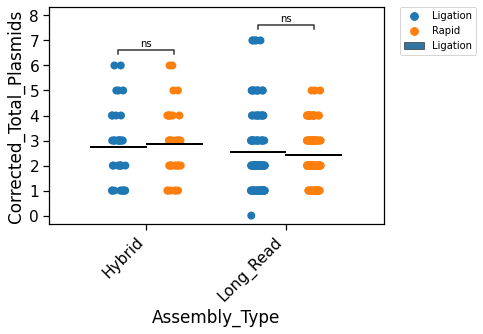

In [22]:
#making lists with the unique values of Assembly Type and Sequencing Condition column
s = mobsuitenoPP['Assembly_Type'].unique() #All the unique feature types.
h = mobsuitenoPP['Sequencing_Kit'].unique() #All the unique habitats.
#Make a dict with 'Vaccine' keys. each entry in the dict points to a list of all the habitats
d = {} 
for i in s:
    d[i] = list(h)

#Use the dict to make the pairs
pairs = []
for i in d:
    stuff = it.combinations(d[i], r=2)
    for j in stuff:
        pairs.append( ((i, j[0]), (i, j[1])) )
print(pairs)
##############################################
states_subcat =["Hybrid", "Long_Read"]
states_order =["Ligation", "Rapid"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': mobsuitenoPP, 'x': 'Assembly_Type', 'y': 'Corrected_Total_Plasmids', "order": states_subcat, 'hue': 'Sequencing_Kit', "hue_order": states_order, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Assembly_Type", y="Corrected_Total_Plasmids", data=mobsuitenoPP, size=8, order=states_subcat, hue="Sequencing_Kit", dodge=True)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Assembly_Type",
            y="Corrected_Total_Plasmids",
            data=mobsuitenoPP,
            showfliers=False,
            showbox=False,
            showcaps=False,
            hue="Sequencing_Kit",
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

In [23]:
#One way ANOVA of the overall effects of Assembly Type on total number of Plasmid clusters detected
results = []
    #make the model
model = smf.ols('Corrected_Total_Plasmids ~ C(Assembly_Type)', data=mobsuitePP).fit()
    #calculate anova. We use type 3 SS in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Assembly_Type),0.000044


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Hybrid vs. Hybrid_PP: t-test independent samples, P_val:1.113e-01 t=-1.602e+00
Long_Read vs. Long_Read_PP: t-test independent samples, P_val:2.405e-05 t=-4.268e+00
Hybrid_PP vs. Long_Read: t-test independent samples, P_val:1.661e-04 t=3.814e+00
Hybrid vs. Long_Read: t-test independent samples, P_val:7.242e-02 t=1.803e+00
Hybrid_PP vs. Long_Read_PP: t-test independent samples, P_val:5.343e-01 t=6.221e-01
Hybrid vs. Long_Read_PP: t-test independent samples, P_val:1.954e-01 t=-1.298e+00


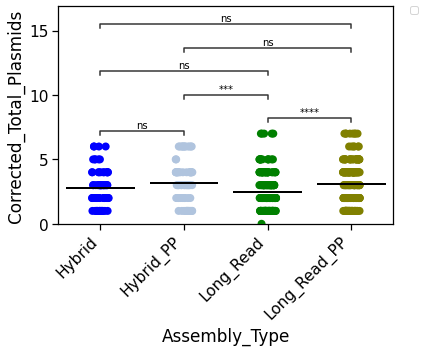

In [27]:
#Generate figure showing relationship for above ANOVA
pairs1=(("Hybrid", "Long_Read"), ("Hybrid", "Hybrid_PP"), ("Long_Read", "Long_Read_PP"),("Long_Read", "Hybrid_PP"), ("Hybrid", "Long_Read_PP"), ("Hybrid_PP", "Long_Read_PP"))
states_subcat =["Hybrid", "Hybrid_PP", "Long_Read", "Long_Read_PP"]

state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': mobsuitePP, 'x': 'Assembly_Type', 'y': 'Corrected_Total_Plasmids', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Assembly_Type", y="Corrected_Total_Plasmids", data=mobsuitePP, size=8, order=states_subcat, palette=['blue','lightsteelblue','green', 'olive','red'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Assembly_Type",
            y="Corrected_Total_Plasmids",
            data=mobsuitePP,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
plt.ylim(0, 15)
plt.yticks([0, 5, 10, 15])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("0104192023_EcoliPlasmidDetection_WGSvPPaddedstats.png", dpi = 400, bbox_inches= "tight")

In [25]:
#One way ANOVA for overall effect of Assembly Condition on total plasmids detected
results = []
    #make the model
model = smf.ols('Corrected_Total_Plasmids ~ C(Filtering)', data=mobsuitePP).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Filtering),0.114997


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Filtered vs. Unfiltered: t-test independent samples, P_val:1.150e-01 t=-1.581e+00


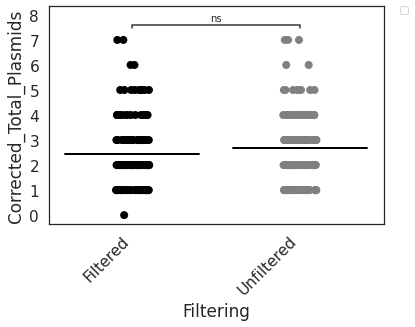

In [26]:
#creating figure for above ANOVA

pairs = []

pairs2=[('Filtered', 'Unfiltered')]
states_subcat =['Filtered', 'Unfiltered']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': mobsuitePP, 'x': 'Filtering', 'y': 'Corrected_Total_Plasmids', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Filtering", y="Corrected_Total_Plasmids", data=mobsuitePP, size=8, order=states_subcat, palette=['black','grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Filtering",
            y="Corrected_Total_Plasmids",
            data=mobsuitePP,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("12122022_EcoliPlasmidDetection_filteredvsunfiltered.png", dpi = 400, bbox_inches= "tight")


In [27]:
#One way ANOVA to get overall effects of Sequencing Condition on total number of plasmid clusters detected without plasmid preps included so just between Rapid and Ligation
results = []
    #make the model
model = smf.ols('Corrected_Total_Plasmids ~ C(Sequencing_Kit)', data=mobsuitePP).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Sequencing_Kit),0.296449


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Ligation vs. Rapid: t-test independent samples, P_val:7.076e-01 t=3.754e-01


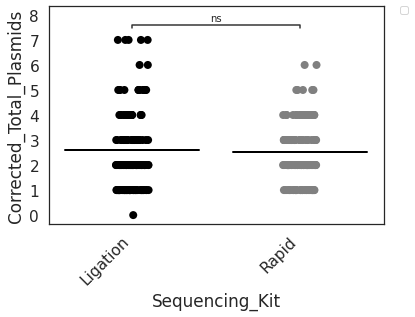

In [28]:


pairs2=[('Ligation', 'Rapid')]
states_subcat =["Ligation", "Rapid"]

state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': mobsuitePP, 'x': 'Sequencing_Kit', 'y': 'Corrected_Total_Plasmids', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Sequencing_Kit", y="Corrected_Total_Plasmids", data=mobsuitePP, size=8, order=states_subcat, palette=['black','grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Sequencing_Kit",
            y="Corrected_Total_Plasmids",
            data=mobsuitePP,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("12122022_EcoliPlasmidDetection_ligationvrapid.png", dpi = 400, bbox_inches= "tight")

In [29]:
#One way ANOVA for overall effects of Assembly Type on total plasmid clusters detected
results = []
    #make the model
model = smf.ols('Corrected_Total_Plasmids ~ C(Category)', data=mobsuitePP).fit()
    #calculate anova. We use type 3 SS in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Category),0.562215


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HLF vs. HLF_PP: t-test independent samples, P_val:3.642e-01 t=-9.191e-01
HLUF vs. HLUF_PP: t-test independent samples, P_val:3.583e-01 t=-9.305e-01
HRF vs. HRF_PP: t-test independent samples, P_val:5.207e-01 t=-6.487e-01
HRUF vs. HRUF_PP: t-test independent samples, P_val:5.303e-01 t=-6.336e-01


(<AxesSubplot:xlabel='Category', ylabel='Corrected_Total_Plasmids'>,
  <statannotations.Annotation.Annotation at 0x7f6525ba5a30>])

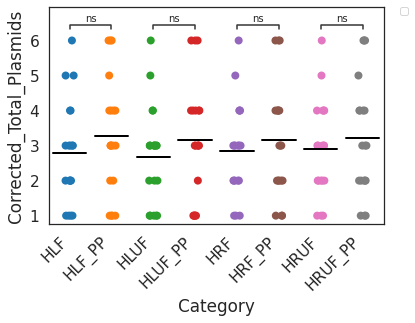

In [30]:
pairs = [('HLF', 'HLF_PP'), ('HLUF', 'HLUF_PP'), ('HRF', 'HRF_PP'), ('HRUF', 'HRUF_PP'), ]
states_subcat = ['HLF', 'HLF_PP', 'HLUF', 'HLUF_PP', 'HRF', 'HRF_PP', 'HRUF', 'HRUF_PP']
state_palette = "colorblind"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': mobsuitePP,'x': 'Category', 'y': 'Corrected_Total_Plasmids', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Corrected_Total_Plasmids", data=mobsuitePP, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Corrected_Total_Plasmids",
            data=mobsuitePP,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLF_PP: t-test independent samples, P_val:2.724e-01 t=-1.115e+00
LLFM vs. LLFM_PP: t-test independent samples, P_val:2.254e-01 t=-1.235e+00
LLFMP vs. LLFMP_PP: t-test independent samples, P_val:2.724e-01 t=-1.115e+00
LLUFM vs. LLUFM_PP: t-test independent samples, P_val:2.687e-01 t=-1.123e+00
LLUFMP vs. LLUFMP_PP: t-test independent samples, P_val:2.687e-01 t=-1.123e+00
LRF vs. LRF_PP: t-test independent samples, P_val:7.955e-02 t=-1.803e+00
LRFM vs. LRFM_PP: t-test independent samples, P_val:5.203e-02 t=-2.011e+00
LRFMP vs. LRFMP_PP: t-test independent samples, P_val:9.255e-02 t=-1.728e+00
LRUF vs. LRUF_PP: t-test independent samples, P_val:4.486e-01 t=-7.661e-01
LRUFM vs. LRUFM_PP: t-test independent samples, P_val:3.345e-01 t=-9.782e-01
LRUFMP vs. LRUFMP_PP: t-test independent samples, P_val:3.890

(<AxesSubplot:xlabel='Category', ylabel='Corrected_Total_Plasmids'>,
  <statannotations.Annotation.Annotation at 0x7f6525afc970>])

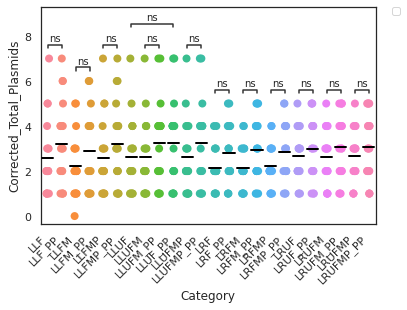

In [31]:
pairs = [('LLF', 'LLF_PP'), ('LLFM', 'LLFM_PP'), ('LLFMP','LLFMP_PP'), ('LLUF', 'LLUF_PP'), ('LLUFM', 'LLUFM_PP'), ('LLUFMP', 'LLUFMP_PP'), ('LRF', 'LRF_PP'), ('LRFM', 'LRFM_PP'), ('LRFMP', 'LRFMP_PP'), ('LRUF', 'LRUF_PP'), ('LRUFM', 'LRUFM_PP'), ('LRUFMP', 'LRUFMP_PP')]
states_subcat = ['LLF', 'LLF_PP', 'LLFM', 'LLFM_PP', 'LLFMP', 'LLFMP_PP', 'LLUF', 'LLUFM', 'LLUFM_PP', 'LLUF_PP', 'LLUFMP', 'LLUFMP_PP', 'LRF', 'LRF_PP', 'LRFM', 'LRFM_PP', 'LRFMP', 'LRFMP_PP', 'LRUF', 'LRUF_PP', 'LRUFM', 'LRUFM_PP', 'LRUFMP', 'LRUFMP_PP']
state_palette = "colorblind"
with sns.plotting_context('notebook', font_scale = 1.0): 
    #Create new plot 
    hue_plot_params = {'data': mobsuitePP,'x': 'Category', 'y': 'Corrected_Total_Plasmids', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Corrected_Total_Plasmids", data=mobsuitePP, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Corrected_Total_Plasmids",
            data=mobsuitePP,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Unpolished vs. Medaka: t-test independent samples, P_val:7.140e-01 t=-3.672e-01
Medaka vs. Medaka_Pilon: t-test independent samples, P_val:8.564e-01 t=-1.813e-01
Unpolished vs. Medaka_Pilon: t-test independent samples, P_val:5.810e-01 t=-5.532e-01


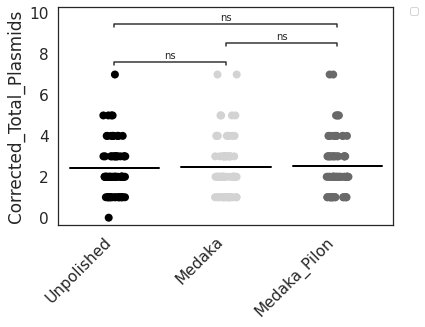

In [32]:

#figure to show differences in plasmid size based on Assembly Condition (long reads filtered or unfiltered) showing only difference between assemblies and plasmid extractions 
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("Unpolished", "Medaka"), ("Unpolished", "Medaka_Pilon"), ("Medaka", "Medaka_Pilon"))
states_subcat =["Unpolished", "Medaka", "Medaka_Pilon"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': mobsuitenoPP,'x': 'Polishing', 'y': 'Corrected_Total_Plasmids', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Polishing", y="Corrected_Total_Plasmids", data=mobsuitenoPP, size=8, order=states_subcat, palette=['black','lightgray','dimgrey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
g = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Polishing",
            y="Corrected_Total_Plasmids",
            data=mobsuitenoPP,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
g.set(xlabel=None)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig("12122022_EcoliPlasmidDetection_polishingimpact.png", dpi = 400, bbox_inches= "tight")